<h1>Project Title: AI Usage Performance Prediction and Need Classification </h1>

<p><b>Project Idea:</b> This project aims to predict ai tools performance and people need of AI using machine learning algorithms. By analyzing various factors like task complexity, Time to respond and Satisfaction Level, the goal is to identify the dependency on AI and its efficiency with users , which would help in choose best ai tool. </p>

<h2>Team Members</h2>

<ul>
  <li>Hazem Medhat</li>
  <li>Omnia Gamal</li>
  <li>Toka Magdy</li>
</ul>



# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import missingno as mno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score, KFold , cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder , Normalizer
from sklearn.preprocessing import StandardScaler , RobustScaler
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Read and Load Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AI_usage.csv to AI_usage.csv


In [ ]:
df = pd.read_csv('AI_usage.csv')

In [ ]:
df.head(5)

,Age,Gender,Occupation,Daily_AI_Usage_Hours,AI_Usage_Purpose,Specialization,AI_Tools_Used,AI_Usage_Frequency,AI_Skill_Level,Device_Used,Data_Privacy_Concern,AI_Trust_Level,Location,Language_Preference,Internet_Speed,AI_Usage_Change_in_6_Months,Uses_Paid_AI_Tools,Satisfaction_Level,Can_Live_Without_AI,Task_Complexity,Time_to_Respond_Seconds,Performance (%)
0,62,Female,Doctor,11,Health,Medicine,Midjourney,Daily,Beginner,Tablet,High,Moderate,Suburban,English,Slow,Increased,Yes,10,No,4,72,73
1,36,Female,Student,10,Daily Life,Education,Other,Sometimes,Intermediate,Mobile,Low,Moderate,Rural,Arabic,Slow,Increased,Yes,3,Yes,1,12,83
2,27,Female,Freelancer,2,Daily Life,Law,NaN,Sometimes,Intermediate,Laptop,High,Moderate,Suburban,French,Medium,Increased,Yes,6,No,2,36,67
3,58,Female,Designer,8,Entertainment,Engineering,ChatGPT,Often,Beginner,Desktop,Medium,High,Rural,English,Slow,Increased,Yes,6,No,2,31,65
4,64,Female,Student,5,Entertainment,Business,Notion AI,Daily,Advanced,Tablet,Low,Moderate,Urban,Spanish,Medium,Decreased,No,7,No,2,41,65


# EDA

In [ ]:
df.shape

(10000, 22)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Daily_AI_Usage_Hours',
       'AI_Usage_Purpose', 'Specialization', 'AI_Tools_Used',
       'AI_Usage_Frequency', 'AI_Skill_Level', 'Device_Used',
       'Data_Privacy_Concern', 'AI_Trust_Level', 'Location',
       'Language_Preference', 'Internet_Speed', 'AI_Usage_Change_in_6_Months',
       'Uses_Paid_AI_Tools', 'Satisfaction_Level', 'Can_Live_Without_AI',
       'Task_Complexity', 'Time_to_Respond_Seconds', 'Performance (%)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          10000 non-null  int64 
 1   Gender                       6638 non-null   object
 2   Occupation                   10000 non-null  object
 3   Daily_AI_Usage_Hours         10000 non-null  int64 
 4   AI_Usage_Purpose             9700 non-null   object
 5   Specialization               9700 non-null   object
 6   AI_Tools_Used                9700 non-null   object
 7   AI_Usage_Frequency           9700 non-null   object
 8   AI_Skill_Level               9700 non-null   object
 9   Device_Used                  9700 non-null   object
 10  Data_Privacy_Concern         10000 non-null  object
 11  AI_Trust_Level               9700 non-null   object
 12  Location                     10000 non-null  object
 13  Language_Preference          100

In [ ]:
df.describe()

,Age,Daily_AI_Usage_Hours,Satisfaction_Level,Task_Complexity,Time_to_Respond_Seconds,Performance (%)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.744800,6.296300,5.516700,2.296000,44.315600,72.004500
std,15.924002,4.860254,2.862925,0.611409,20.474895,9.530339
min,18.000000,0.000000,1.000000,1.000000,10.000000,55.000000
25%,29.000000,3.000000,3.000000,2.000000,29.000000,65.000000
50%,41.000000,6.000000,6.000000,2.000000,40.000000,67.000000
75%,53.000000,9.000000,8.000000,3.000000,50.000000,83.000000
max,149.000000,49.000000,10.000000,4.000000,120.000000,87.000000


In [ ]:
df.describe(include='object')

,Gender,Occupation,AI_Usage_Purpose,Specialization,AI_Tools_Used,AI_Usage_Frequency,AI_Skill_Level,Device_Used,Data_Privacy_Concern,AI_Trust_Level,Location,Language_Preference,Internet_Speed,AI_Usage_Change_in_6_Months,Uses_Paid_AI_Tools,Can_Live_Without_AI
count,6638,10000,9700,9700,9700,9700,9700,9700,10000,9700,10000,10000,9700,10000,9800,10000
unique,2,8,6,7,6,4,3,4,3,3,3,4,3,3,2,2
top,Male,Designer,Study,Business,Midjourney,Daily,Advanced,Laptop,High,Low,Urban,English,Slow,Same,Yes,No
freq,3352,1298,1665,1434,1666,2438,3255,2445,3386,3239,3419,2550,3266,3356,4966,5004


In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['Age',
 'Daily_AI_Usage_Hours',
 'Satisfaction_Level',
 'Task_Complexity',
 'Time_to_Respond_Seconds',
 'Performance (%)']

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols

['Gender',
 'Occupation',
 'AI_Usage_Purpose',
 'Specialization',
 'AI_Tools_Used',
 'AI_Usage_Frequency',
 'AI_Skill_Level',
 'Device_Used',
 'Data_Privacy_Concern',
 'AI_Trust_Level',
 'Location',
 'Language_Preference',
 'Internet_Speed',
 'AI_Usage_Change_in_6_Months',
 'Uses_Paid_AI_Tools',
 'Can_Live_Without_AI']

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,3362
Occupation,0
Daily_AI_Usage_Hours,0
AI_Usage_Purpose,300
Specialization,300
AI_Tools_Used,300
AI_Usage_Frequency,300
AI_Skill_Level,300
Device_Used,300


In [ ]:
df.duplicated().sum()

np.int64(0)

# Data Cleaning

## 1- Missing Values

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,3352
Female,3286


In [ ]:
df['Gender'].fillna(method='ffill', inplace=True)
df['Gender'].value_counts()

,count
Gender,
Male,5018
Female,4982


In [ ]:
df['Uses_Paid_AI_Tools'].fillna(method='ffill', inplace=True)

In [ ]:
df['AI_Tools_Used'].fillna('Other', inplace=True)

In [ ]:
cols_mode = ['AI_Usage_Purpose', 'Specialization', 'AI_Usage_Frequency', 'AI_Skill_Level', 'Device_Used', 'AI_Trust_Level' , 'Internet_Speed']
for col in cols_mode:
  mode_value = df[col].mode()[0]
  df[col].fillna(mode_value, inplace=True)

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Occupation,0
Daily_AI_Usage_Hours,0
AI_Usage_Purpose,0
Specialization,0
AI_Tools_Used,0
AI_Usage_Frequency,0
AI_Skill_Level,0
Device_Used,0


## 2-Outliers

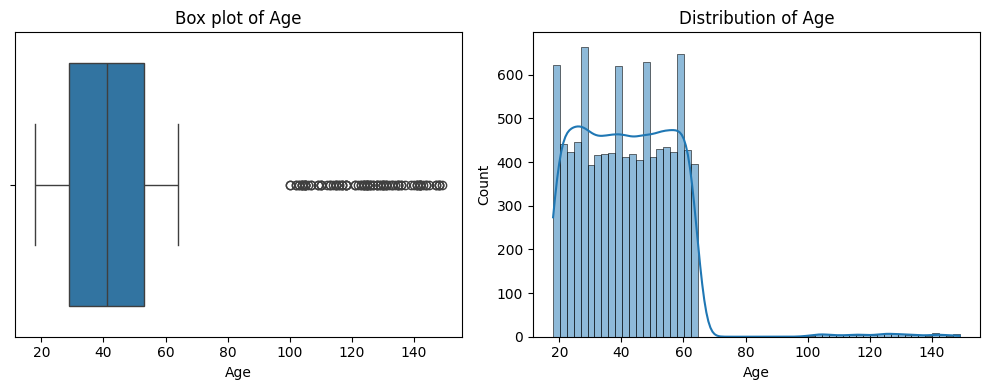

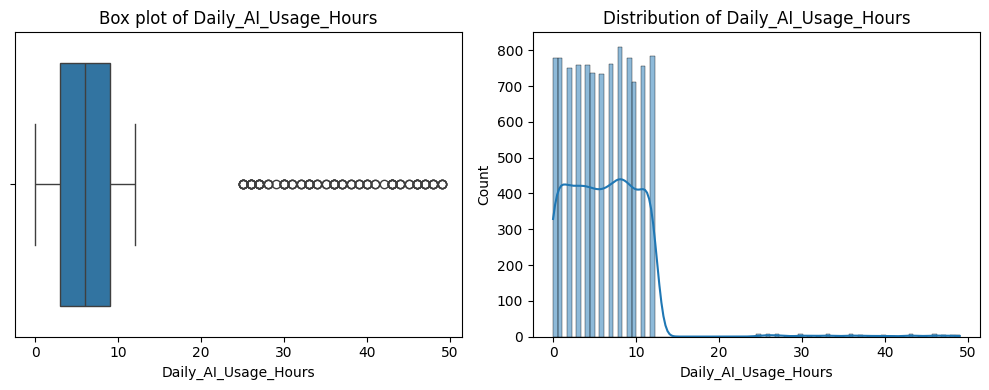

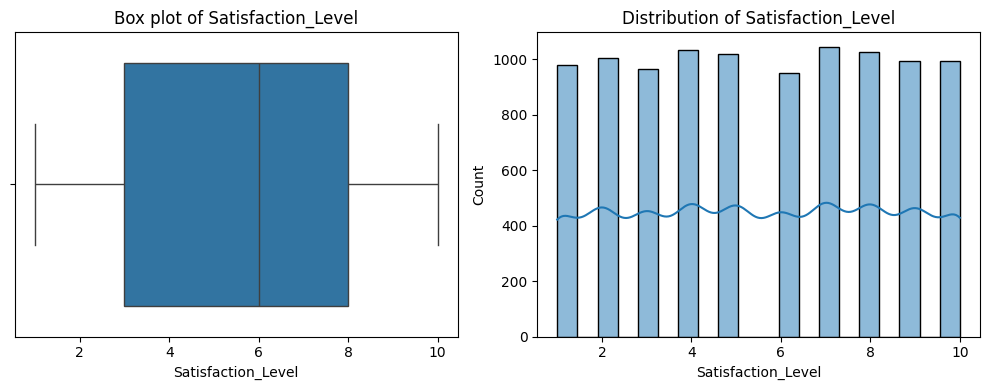

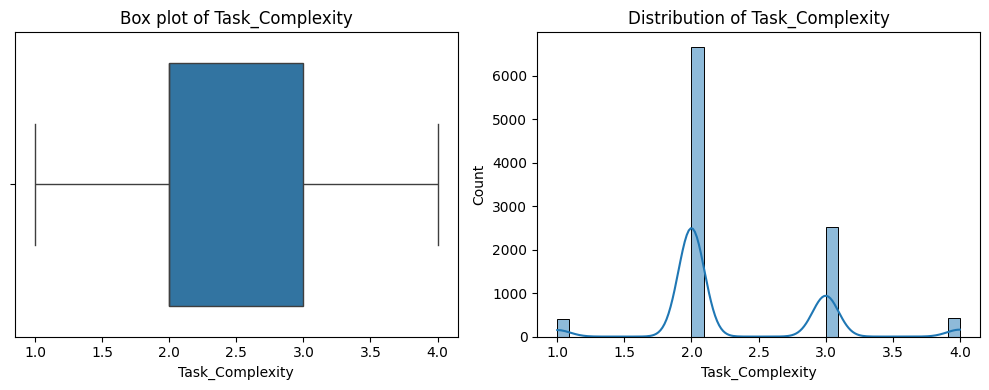

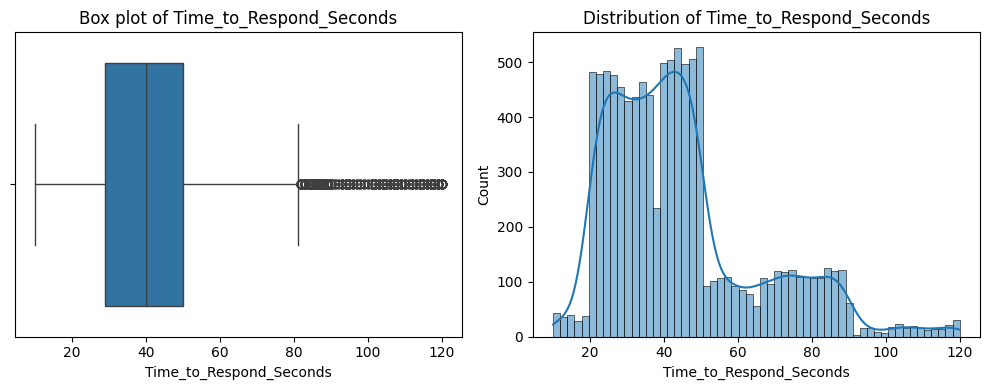

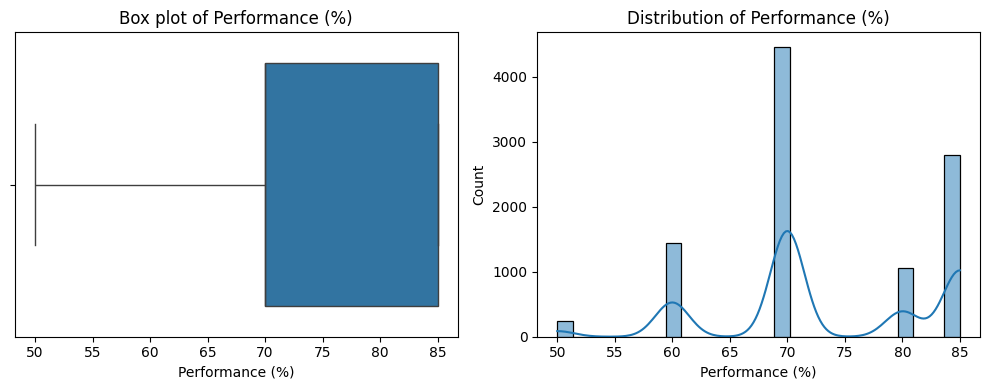

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(10, 4))

    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')

    # KDE Plot
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.tight_layout()
    plt.show()

In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_cleaned
# Remove outliers from 'length of stay days'
df_cleaned = remove_outliers_iqr(df, 'Age')
df_cleaned = remove_outliers_iqr(df, 'Daily_AI_Usage_Hours')
print(f"Original shape: {df.shape}")
print(f"Shape after removing outliers from 'Length_of_Stay_Days': {df_cleaned.shape}")
# You can now replace the original df with df_cleaned if you want to work with the cleaned data
df = df_cleaned

Original shape: (10000, 22)
Shape after removing outliers from 'Length_of_Stay_Days': (9900, 22)


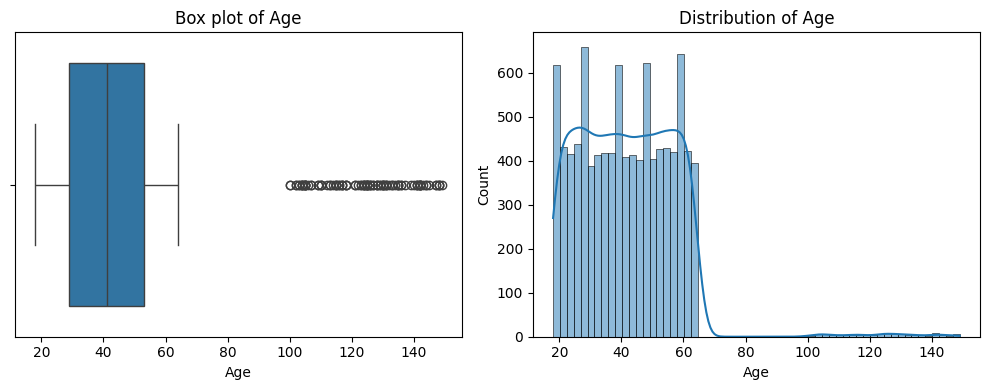

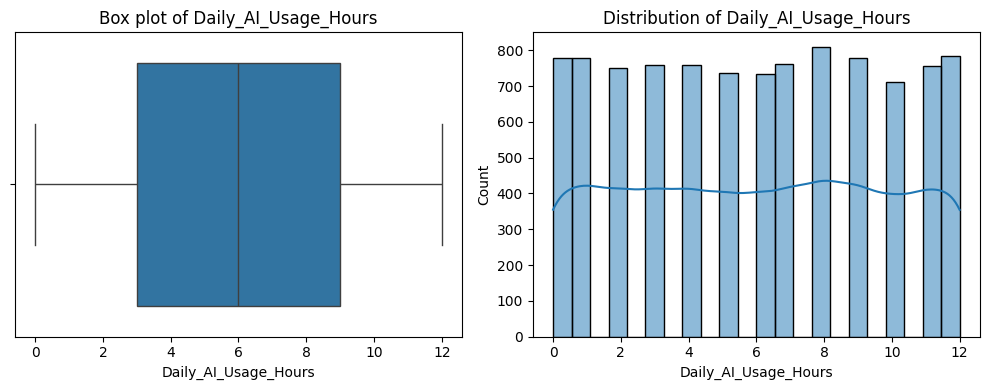

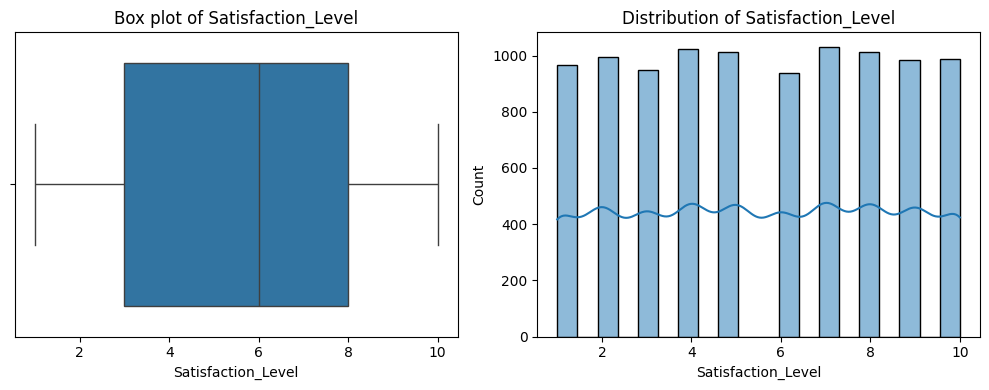

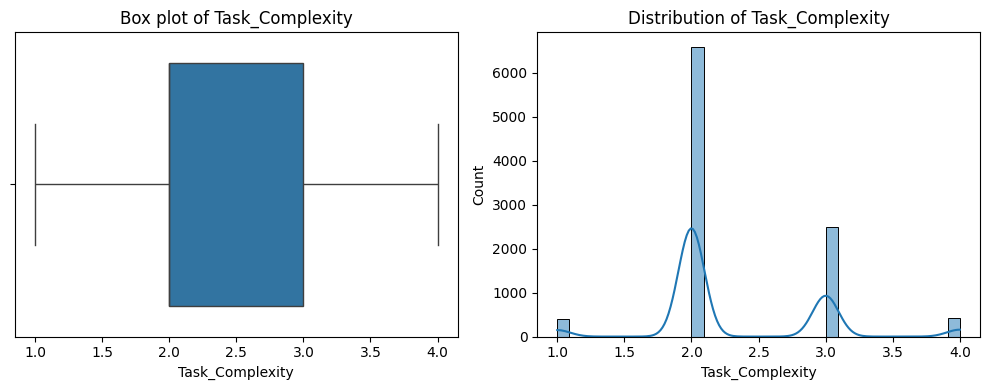

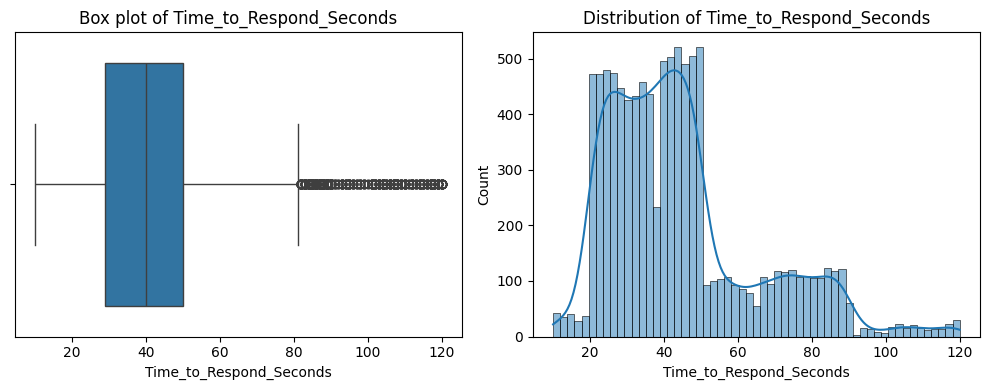

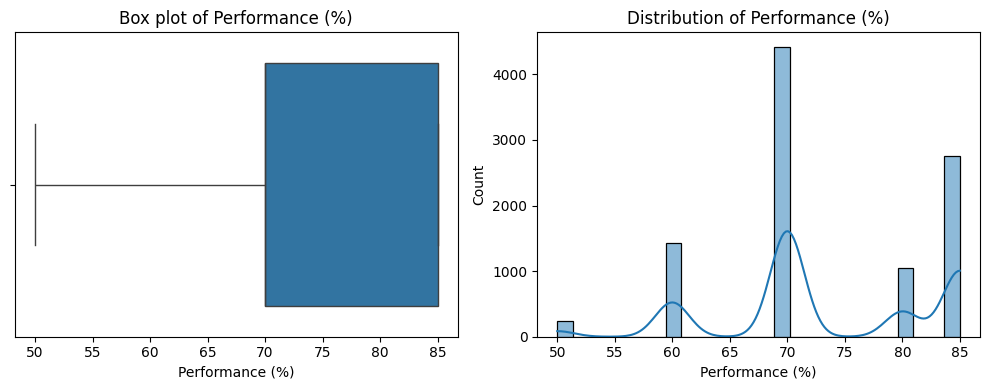

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(10, 4))

    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')

    # KDE Plot
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.tight_layout()
    plt.show()

In [ ]:
df_cleaned = df.copy()
from google.colab import files

# حفظ الداتا بعد التنضيف في ملف CSV
df_cleaned.to_csv("cleaned_data.csv", index=False)

# تحميل الملف
files.download("cleaned_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Pre Processing

In [ ]:
target_cols = ['Can_Live_Without_AI','Performance (%)']

In [ ]:
X_classifcation=df.drop(['Can_Live_Without_AI'],axis=1)
Y_classification=df['Can_Live_Without_AI']

In [ ]:
X_regression = df.drop(['Performance (%)', 'Can_Live_Without_AI'], axis=1)
Y_regression = df['Performance (%)']

In [ ]:
X_train_classifcation, X_test_classifcation, y_train_classifcation, y_test_classifcation = train_test_split(
    X_classifcation, Y_classification, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_regression, Y_regression, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
le = LabelEncoder()
y_train_classification = le.fit_transform(y_train_classifcation)
y_test_classification = le.transform(y_test_classifcation)

In [ ]:
for col in X_train_classifcation.columns:
    if X_train_classifcation[col].dtype == 'object':
        le = LabelEncoder()
        X_train_classifcation[col] = le.fit_transform(X_train_classifcation[col])
        X_test_classifcation[col] = le.transform(X_test_classifcation[col])

        X_train_regression[col] = le.transform(X_train_regression[col])
        X_test_regression[col] = le.transform(X_test_regression[col])

In [ ]:
!pip install category_encoders

import category_encoders as ce

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
X_train_classifcation.head(5)

,Age,Gender,Occupation,Daily_AI_Usage_Hours,AI_Usage_Purpose,Specialization,AI_Tools_Used,AI_Usage_Frequency,AI_Skill_Level,Device_Used,Data_Privacy_Concern,AI_Trust_Level,Location,Language_Preference,Internet_Speed,AI_Usage_Change_in_6_Months,Uses_Paid_AI_Tools,Satisfaction_Level,Task_Complexity,Time_to_Respond_Seconds,Performance (%)
9254,31,1,0.504478,11,0.501585,0.489744,0.492852,0.493613,1,0.513444,2,1,0.495086,0.499759,2,0,0,10,2,38,67
1561,29,1,0.499497,0,0.521597,0.489362,0.492852,0.505612,2,0.507503,2,0,0.495086,0.497967,2,2,0,4,3,41,80
1670,47,0,0.499497,0,0.521597,0.493101,0.490623,0.505612,0,0.507503,0,1,0.495027,0.499759,2,0,1,9,3,65,65
6087,42,0,0.487829,4,0.496257,0.489744,0.490623,0.493613,2,0.507503,0,1,0.506631,0.500249,0,1,1,3,2,50,65
6669,57,1,0.504478,6,0.485155,0.515068,0.490623,0.502593,1,0.513444,2,2,0.495086,0.497967,0,0,1,1,3,78,61


In [ ]:
label_encode_cols = ["Gender" , "AI_Skill_Level"  , "Uses_Paid_AI_Tools", "Data_Privacy_Concern", "AI_Trust_Level" , "Internet_Speed" , "AI_Usage_Change_in_6_Months"]
target_encode_cols = ["Language_Preference","AI_Tools_Used" ,  "Location" , "Device_Used" , "AI_Usage_Frequency" , "Specialization" , "AI_Usage_Purpose" , "Occupation"]

# Apply Label Encoding to classification data
for col in label_encode_cols:
    if col in X_train_classifcation.columns and X_train_classifcation[col].dtype == 'object':
        le = LabelEncoder()
        X_train_classifcation[col] = le.fit_transform(X_train_classifcation[col])
        X_test_classifcation[col] = le.transform(X_test_classifcation[col])

# Apply Target Encoding to classification data
for col in target_encode_cols:
    if col in X_train_classifcation.columns and X_train_classifcation[col].dtype == 'object':
        encoder = ce.TargetEncoder(cols=[col])
        X_train_classifcation[col] = encoder.fit_transform(X_train_classifcation[col], y_train_classification)
        X_test_classifcation[col] = encoder.transform(X_test_classifcation[col])

# Apply Label Encoding to regression data (using the same encoders as classification)
for col in label_encode_cols:
    if col in X_train_regression.columns and X_train_regression[col].dtype == 'object':
         # Assuming the levels are the same as in classification data
        le = LabelEncoder()
        # Fit on the combined data or training data from classification to ensure consistency
        X_train_regression[col] = le.fit_transform(X_train_regression[col])
        X_test_regression[col] = le.transform(X_test_regression[col])

# Apply Target Encoding to regression data (fit on regression target)
for col in target_encode_cols:
    if col in X_train_regression.columns and X_train_regression[col].dtype == 'object':
        encoder = ce.TargetEncoder(cols=[col])
        X_train_regression[col] = encoder.fit_transform(X_train_regression[col], y_train_regression)
        X_test_regression[col] = encoder.transform(X_test_regression[col])

In [ ]:
scaler = StandardScaler()

X_train_classification = scaler.fit_transform(X_train_classifcation)
X_test_classification = scaler.transform(X_test_classifcation)

X_train_regression = scaler.fit_transform(X_train_regression)
X_test_regression = scaler.transform(X_test_regression)

In [ ]:
scaler = RobustScaler()

X_train_classification = scaler.fit_transform(X_train_classifcation)
X_test_classification = scaler.transform(X_test_classifcation)

X_train_regression = scaler.fit_transform(X_train_regression)
X_test_regression = scaler.transform(X_test_regression)

In [ ]:
normalizer = Normalizer()  # default norm='l2'

X_train_classification = normalizer.fit_transform(X_train_classifcation)
X_test_classification = normalizer.transform(X_test_classifcation)

X_train_regression = normalizer.fit_transform(X_train_regression)
X_test_regression = normalizer.transform(X_test_regression)

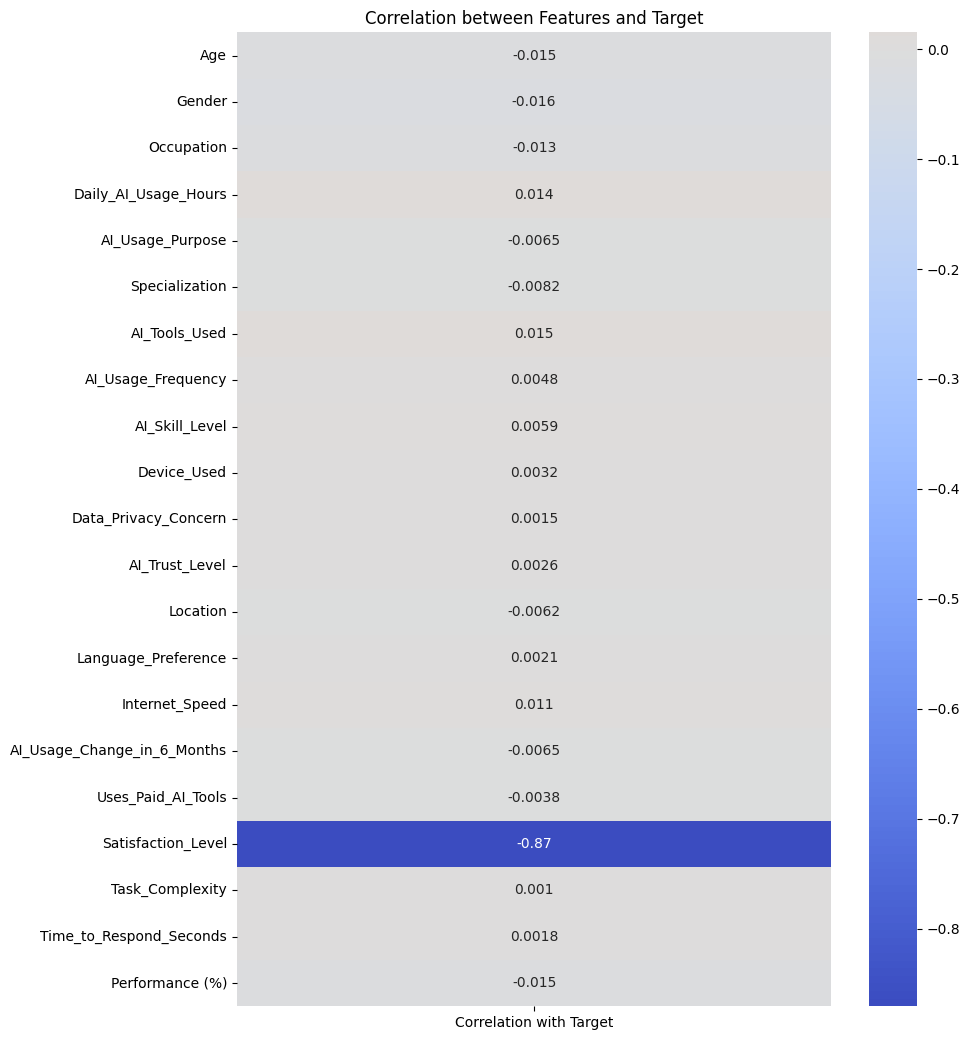

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y_classification)

correlations = X_classifcation.corrwith(pd.Series(y_encoded))

corr_df = correlations.to_frame(name='Correlation with Target')

plt.figure(figsize=(10, len(corr_df) * 0.5))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, cbar=True)

plt.title('Correlation between Features and Target')
plt.tight_layout()
plt.show()


In [ ]:
features = ['AI_Tools_Used','Device_Used','Internet_Speed','Gender',
            'Specialization','Language_Preference','Uses_Paid_AI_Tools',
            'AI_Skill_Level', 'AI_Usage_Purpose','AI_Usage_Frequency',
            'Age','Data_Privacy_Concern',
            ]

X_classification = df[features]
Y_classification = df['Can_Live_Without_AI']

# Modeling

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC()
}

for name, model in models.items():
    print(f'\nModel: {name}')
    model.fit(X_train_classifcation, y_train_classifcation)
    y_pred = model.predict(X_test_classifcation)
    print("Accuracy:", accuracy_score(y_test_classifcation, y_pred))
    print("Classification Report:\n", classification_report(y_test_classifcation, y_pred))



Model: Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       995
         Yes       1.00      1.00      1.00      1005

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Model: Logistic Regression
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       995
         Yes       1.00      1.00      1.00      1005

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Model: Decision Tree
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       995
         Yes       1.00      1.00      1.00      10

In [ ]:
 regressors = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

for name, reg in regressors.items():
    print(f'\nRegressor: {name}')
    reg.fit(X_train_regression, y_train_regression)
    y_pred = reg.predict(X_test_regression)
    print("MSE:", mean_squared_error(y_test_regression, y_pred))
    print("R² Score:", r2_score(y_test_regression, y_pred))



Regressor: Linear Regression
MSE: 44.72560042143235
R² Score: 0.49868808886411553

Regressor: Random Forest
MSE: 3.5850112
R² Score: 0.9598169996784586

Regressor: Decision Tree
MSE: 7.125
R² Score: 0.9201386379794343

Regressor: Support Vector Regressor
MSE: 33.81767971221301
R² Score: 0.6209507421484091


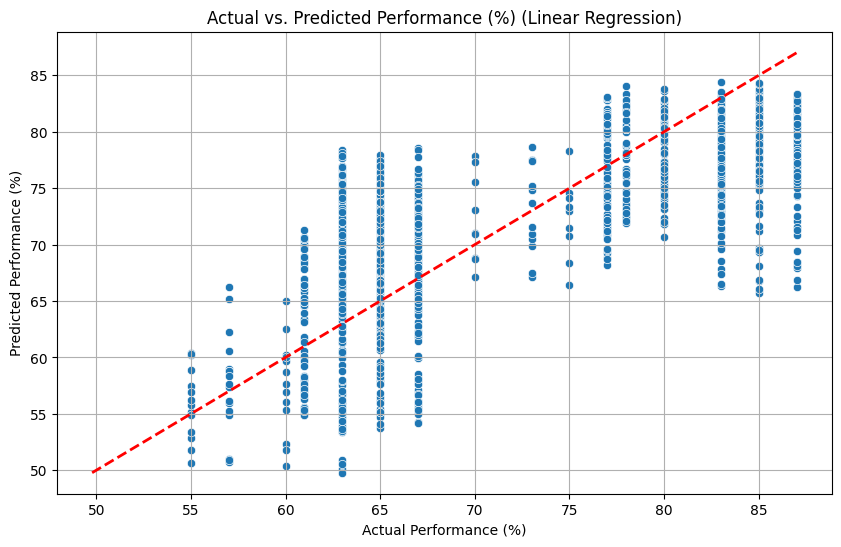

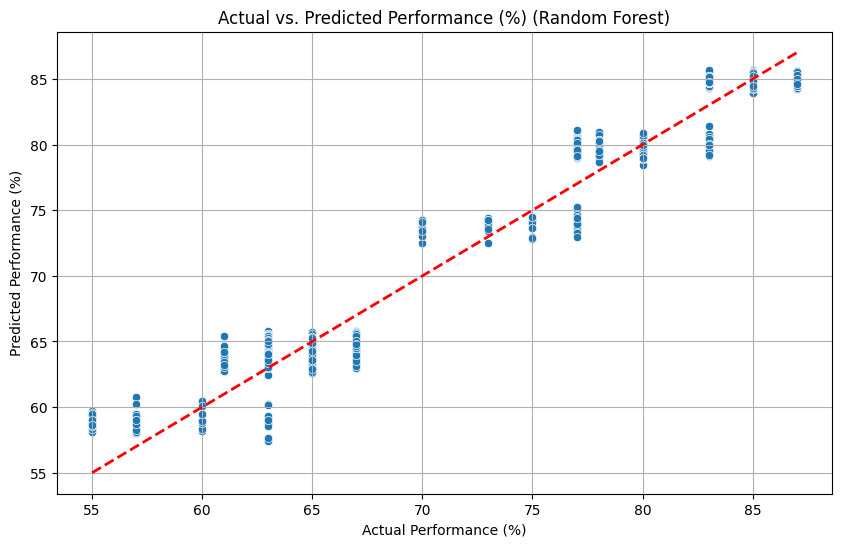

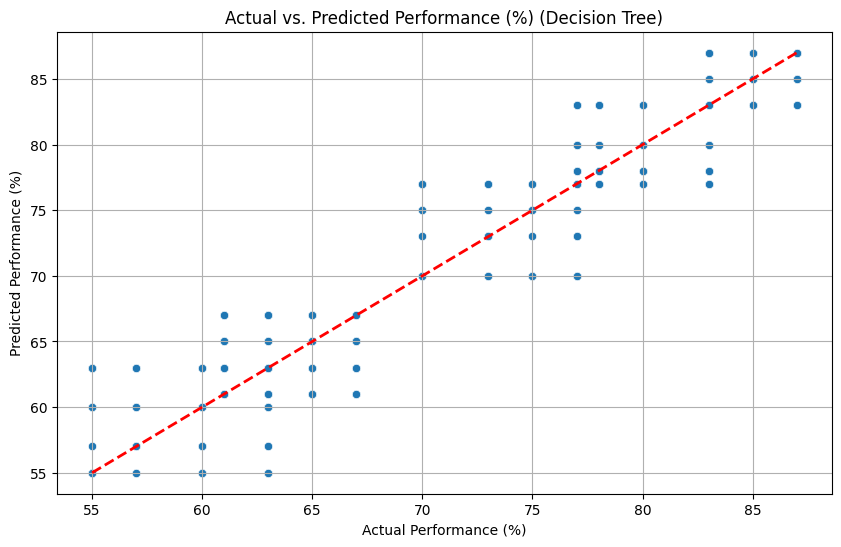

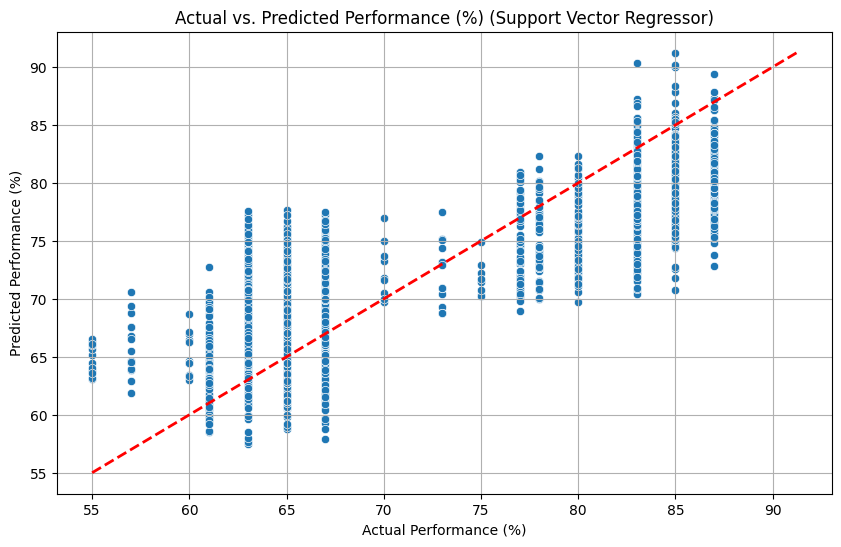

In [ ]:
for name, reg in regressors.items():
    plt.figure(figsize=(10, 6))
    # Use the trained regressor to predict on the test data
    y_pred = reg.predict(X_test_regression)

    # Create a scatter plot of actual vs predicted values
    sns.scatterplot(x=y_test_regression, y=y_pred)

    # Add a line representing perfect prediction (y=x)
    min_val = min(y_test_regression.min(), y_pred.min())
    max_val = max(y_test_regression.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

    plt.title(f'Actual vs. Predicted Performance (%) ({name})')
    plt.xlabel('Actual Performance (%)')
    plt.ylabel('Predicted Performance (%)')
    plt.grid(True)
    plt.show()

In [ ]:
for name, reg in regressors.items():
    print(f'\nRegressor: {name}')
    print(f"Training score : {reg.score(X_train_regression, y_train_regression)}")
    print(f"Testing score : {reg.score(X_test_regression, y_test_regression)}")


Regressor: Linear Regression
Training score : 0.5130149157760435
Testing score : 0.49868808886411553

Regressor: Random Forest
Training score : 0.9943050159396244
Testing score : 0.9598169996784586

Regressor: Decision Tree
Training score : 1.0
Testing score : 0.9201386379794343

Regressor: Support Vector Regressor
Training score : 0.6771683521451952
Testing score : 0.6209507421484091
